# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [8]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

p = 60/100
q = 40/100

print(f"The probability that the fruit is an apple is: {round(p * 100, 3)}% and {round(q * 100, 3)}% that it is an orange")

The probability that the fruit is an apple is: 60.0% and 40.0% that it is an orange


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [9]:
# What is the probability that the first 5 fruits are all apples?

p_5_apples = p**5
print(f"The probability that the 5 fruits are all apples is: {round(p_5_apples * 100, 3)}%")

The probability that the 5 fruits are all apples is: 7.776%


In [35]:
# What is the probability that the first 5 fruits are all apples?
p_15_oranges = q**15
p_5_apples_and_next_15_oranges = p_5_apples * p_15_oranges
print(f"The probability that the 5 fruits are all apples and the next 15 are oranges is: {round(p_5_apples_and_next_15_oranges * 100, 10)}%")

The probability that the 5 fruits are all apples and the next 15 are oranges is: 8.3494e-06%


In [41]:
p_15_oranges

1.073741824000001e-06

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [33]:
# your solution here
n = 20  # Total trials
k = 5   # Successes (e.g., apples)

binom_coeff = math.comb(n, k)
binom_coeff

15504

In [32]:
def binomial_coefficient(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

print(binomial_coefficient(20, 15)) 

15504


In [44]:
# your solution here
p_5_apples_and_15_oranges = p_5_apples * p_15_oranges * binom_coeff
print(f"The probability that the 5 fruits are all apples and 15 are oranges is: {round(p_5_apples_and_15_oranges * 100, 10)}%")

The probability that the 5 fruits are all apples and 15 are oranges is: 0.1294493522%


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [48]:
# your code here
from scipy.stats import binom

n = 20 
p = 0.6 
k = 4  # Less than 5 apples

probability = binom.cdf(k, n, p) 
print(f"Probability of picking less than 5 apples: {round(probability * 100, 3)}%")


Probability of picking less than 5 apples: 0.032%


<!-- **Plot the PDF (probability distributiom function) for the above binomial distribution.** -->

**Plot the Probability Mass Function (PMF) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

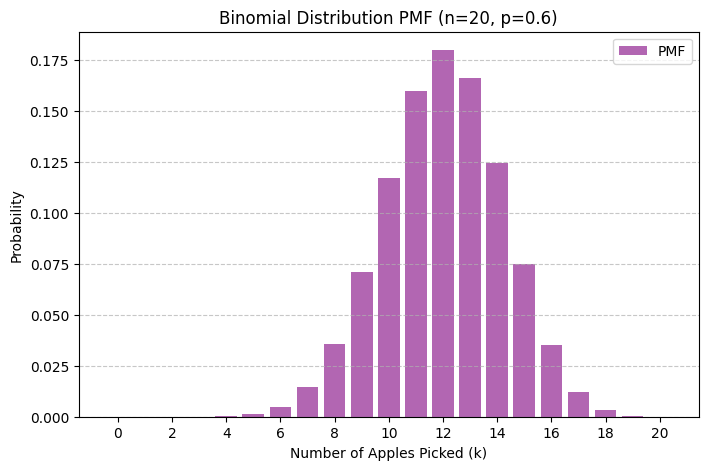

In [50]:
# your code here
# Please label the axes and give a title to the plot 

# Define parameters
n = 20 
p = 0.6 
x = np.arange(0, n+1)  # Possible values of k (0 to 20)
y = binom.pmf(x, n, p)  # Compute binomial PDF

# Plot the probability mass function
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='purple', alpha=0.6, label='PMF')
plt.xlabel('Number of Apples Picked (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF (n=20, p=0.6)')
plt.xticks(np.arange(0, n+1, 2))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [53]:
# your code here 

import math

# Given parameters
lmbda = 2.3  # Average number of goals
k = 5  # Desired number of goals

# Poisson probability formula
poisson_prob = (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)

# Print result
print(f"The probability of scoring exactly {k} goals in a match is: {round(poisson_prob * 100, 3)}%")


The probability of scoring exactly 5 goals in a match is: 5.378%


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

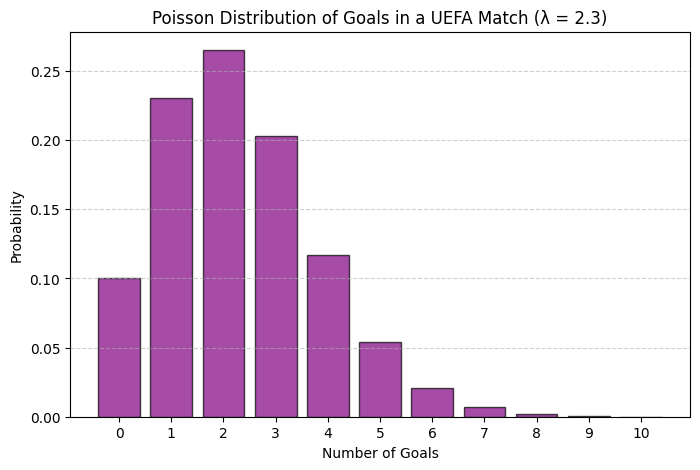

In [55]:
# your code here
# Please label the axes and give a title to the plot 

# Given parameters
lmbda = 2.3  
k_values = np.arange(0, 11) 

# Calculate Poisson probabilities
poisson_probs = stats.poisson.pmf(k_values, lmbda)

# Plotting the Poisson Distribution
plt.figure(figsize=(8,5))
plt.bar(k_values, poisson_probs, color='purple', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.title("Poisson Distribution of Goals in a UEFA Match (λ = 2.3)")
plt.xticks(k_values)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()